In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import mplhep as hep
from matplotlib import gridspec
import datetime
import os
import numpy as np
timestamp = datetime.datetime.now()

In [48]:
path = 'results/multiple_results/'

#ser = pd.read_csv('results/serial_results/csv/4serial_pin3_40s_20000e.csv')
#ser_str = 'results/serial_results/csv/4serial_pin3_40s_20000e.csv'
#alps = pd.read_csv('results/alps_results/csv/4alps_pin3_40s_20000e.csv')
#alps_str = 'results/alps_results/csv/4alps_pin3_40s_20000e.csv'

cuda1 = pd.read_csv('results/cuda_results/csv/3cuda_gpu1_pin1_disNone_20s_20000e.csv')
cuda2 = pd.read_csv('results/cuda_results/csv/3cuda_gpu1_pin1_disCache_20s_20000e.csv')
cuda3 = pd.read_csv('results/cuda_results/csv/3cuda_gpu1_pin1_disBoth_20s_20000e.csv')
cuda1_str = 'results/cuda_results/csv/3cuda_gpu1_pin1_disNone_20s_20000e.csv'
cuda2_str = 'results/cuda_results/csv/3cuda_gpu1_pin1_disCache_20s_20000e.csv'
cuda3_str = 'results/cuda_results/csv/3cuda_gpu1_pin1_disBoth_20s_20000e.csv'

#alpc1 = pd.read_csv('results/alpc_results/csv/4alpc1_pin3_40s_20000e.csv')
#alpc2 = pd.read_csv('')
#alpc3 = pd.read_csv('results/alpc_results/csv/4alpc3_pin3_40s_20000e.csv')
#alpc1_str = 'results/alpc_results/csv/4alpc1_pin3_40s_20000e.csv'
#alpc2_str = ''
#alpc3_str = 'results/alpc_results/csv/4alpc3_pin3_40s_20000e.csv'

In [ ]:
def plot2(combo,dataframe1,label1,df1str,dataframe2,label2,df2str,gpu='None'):
    '''Plot 2 csv files of library outputs on same figure
        combo - CPU for (alpaka) serial libraries, CPUGPU for mix of (alpaka) serial and (alpaka) cuda libraries, GPU for (alpaka) cuda libraries'''
    
    df_streams1 = dataframe1['nStreams']
    df_throughput1 = dataframe1['throughput']
    thru_std1 = dataframe1['tput_std']
    thru_ave1 = dataframe1['tput_ave']
    events_val1 = dataframe1['nEvents'].iat[0]

    df_streams2 = dataframe2['nStreams']
    df_throughput2 = dataframe2['throughput']
    thru_std2 = dataframe2['tput_std']
    thru_ave2 = dataframe2['tput_ave']
    events_val2 = dataframe2['nEvents'].iat[0]
    
    nStreams = df_streams1.iat[-1]
    ratio1 = thru_ave2 / thru_ave1

    plt.style.use(hep.style.CMS)
    plt.figure(figsize = (20,10))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    fig = plt.subplots(2)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1],sharex=ax1)

    if combo == 'CPU':
        ax1.plot([], [], ' ', label="CPU - Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz")
        ax1.plot(df_streams1,thru_ave1,'ro',markersize=7,linestyle='solid',label=label1)
        ax1.plot(df_streams2,thru_ave2,'b^',markersize=7,linestyle='solid',label=label2)
        ax1.errorbar(df_streamd1,thru_ave1,yerr=thru_std1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams2,thru_ave2,yerr=thru_std2,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams3,thru_ave3,yerr=thru_std3,fmt='g',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')   
        plot_title = label1 + label2 + '_' + str(nStreams) + 's_' + str(events_val1) + 'e.png'
        
    if combo == 'CPUGPU':
        ax1.plot([], [], ' ', label="CPU - Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz")
        ax1.plot([], [], ' ', label="GPU - " + gpu)
        ax1.plot(df_streams1,thru_ave1,'ro',markersize=7,linestyle='solid',label=label1)
        ax1.plot(df_streams2,thru_ave2,'b^',markersize=7,linestyle='solid',label=label2)
        ax1.errorbar(df_streams1,thru_ave1,yerr=thru_std1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams2,thru_ave2,yerr=thru_std2,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams3,thru_ave3,yerr=thru_std3,fmt='g',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='center',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')  
        plot_title = label1 + label2 + '_' + gpu + '_' + str(nStreams) + 's_' + str(events_val1) + 'e.png'
            
    if combo == 'GPU':
        ax1.plot([], [], ' ', label="GPU - " + gpu)
        ax1.plot(df_streams1,thru_ave1,'ro',markersize=7,linestyle='solid',label=label1)
        ax1.plot(df_streams2,thru_ave2,'b^',markersize=7,linestyle='solid',label=label2)
        ax1.errorbar(df_streams1,thru_ave1,yerr=thru_std1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams2,thru_ave2,yerr=thru_std2,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams3,thru_ave3,yerr=thru_std3,fmt='g',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')
        plot_title = label1 + label2 + '_' + gpu + '_' + str(nStreams) + 's_' + str(events_val1) + 'e.png'

    ax1.set_ylim(bottom=0)
    ax2.plot(df_streams1,ratio1,'bP',markersize=10)
    plt.axhline(y=1,linewidth=2,linestyle='dashed',color='darkviolet')
    plt.xticks(df_streams1)
    ax2.tick_params(axis='y',labelsize=16)
    ax2.set_xlabel('Number of Threads/Streams')
    ax2.set_ylabel('Speed Up',fontsize=25)
    ax2.set_ylim(min(full_ratios)-0.15,max(full_ratios)+0.15)
    plt.subplots_adjust(hspace=.0)
    
    path = 'results/multiple_results/'
    plt.savefig(path + plot_title)
    logfile = path + 'multiple_log.txt'
    with open(logfile,"a") as myfile:
        myfile.write('\n')
        myfile.write(str(timestamp))
        myfile.write('\n')
        myfile.write('\t' + 'Inputs: ')
        myfile.write('\n')
        myfile.write('\t\t' + df1str)
        myfile.write('\n')
        myfile.write('\t\t' + df2str)
        myfile.write('\n')
        myfile.write('\t' + 'Output: ' + path + plot_title)
    
    plt.show() 

In [ ]:
plot2(GPU,cuda2,label1,df1str,dataframe2,label2,df2str,gpu='TESLA_T4')

In [46]:
def plot3(combo,dataframe1,label1,df1str,dataframe2,label2,df2str,dataframe3,label3,df3str,gpu='None'):
    '''Plot 3 csv files of library outputs on same figure
        combo - CPU for (alpaka) serial libraries, CPUGPU for mix of (alpaka) serial and (alpaka) cuda libraries, GPU for (alpaka) cuda libraries'''
    
    df_streams1 = dataframe1['nStreams']
    df_throughput1 = dataframe1['throughput']
    thru_std1 = dataframe1['tput_std']
    thru_ave1 = dataframe1['tput_ave']
    events_val1 = dataframe1['nEvents'].iat[0]

    df_streams2 = dataframe2['nStreams']
    df_throughput2 = dataframe2['throughput']
    thru_std2 = dataframe2['tput_std']
    thru_ave2 = dataframe2['tput_ave']
    events_val2 = dataframe2['nEvents'].iat[0]
    
    df_streams3 = dataframe3['nStreams']
    df_throughput3 = dataframe3['throughput']
    thru_std3 = dataframe3['tput_std']
    thru_ave3 = dataframe3['tput_ave']
    events_val3 = dataframe3['nEvents'].iat[0]
    
    nStreams = df_streams1.iat[-1]
    ratio1 = thru_ave2 / thru_ave1
    ratio2 = thru_ave3 / thru_ave1
    full_ratios = np.concatenate((ratio1,ratio2))
    
    plt.style.use(hep.style.CMS)
    plt.figure(figsize = (20,10))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    fig = plt.subplots(2)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1],sharex=ax1)

    
    if combo == 'CPU':
        ax1.plot([], [], ' ', label="CPU - Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz")
        ax1.plot(df_streams1,thru_ave1,'ro',markersize=7,linestyle='solid',label=label1)
        ax1.plot(df_streams2,thru_ave2,'b^',markersize=7,linestyle='solid',label=label2)
        ax1.plot(df_streams3,thru_ave3,'gs',markersize=7,linestyle='solid',label=label3)
        ax1.errorbar(df_streams1,thru_ave1,yerr=thru_std1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams2,thru_ave2,yerr=thru_std2,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams3,thru_ave3,yerr=thru_std3,fmt='g',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='lower right',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance') 
        label1 = label1.replace(' ', '_')
        label2 = label2.replace(' ', '_')
        label3 = label3.replace(' ', '_')
        plot_title = label1 + label2 + label3 + '_' + str(nStreams) + 's_' + str(events_val1) + 'e.png'
        
    if combo == 'CPUGPU':
        ax1.plot([], [], ' ', label="CPU - Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz")
        ax1.plot([], [], ' ', label="GPU - " + gpu)
        ax1.plot(df_streams1,thru_ave1,'ro',markersize=7,linestyle='solid',label=label1)
        ax1.plot(df_streams2,thru_ave2,'b^',markersize=7,linestyle='solid',label=label2)
        ax1.plot(df_streams3,thru_ave3,'gs',markersize=7,linestyle='solid',label=label3)
        ax1.errorbar(df_streams1,thru_ave1,yerr=thru_std1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams2,thru_ave2,yerr=thru_std2,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams3,thru_ave3,yerr=thru_std3,fmt='g',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='center',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')  
        label1 = label1.replace(' ', '_')
        label2 = label2.replace(' ', '_')
        label3 = label3.replace(' ', '_')
        plot_title = label1 + label2 + label3 + '_' + gpu + '_' + str(nStreams) + 's_' + str(events_val1) + 'e.png'
            
    if combo == 'GPU':
        ax1.plot([], [], ' ', label="GPU - " + gpu)
        ax1.plot(df_streams1,thru_ave1,'ro',markersize=7,linestyle='solid',label=label1)
        ax1.plot(df_streams2,thru_ave2,'b^',markersize=7,linestyle='solid',label=label2)
        ax1.plot(df_streams3,thru_ave3,'gs',markersize=7,linestyle='solid',label=label3)
        ax1.errorbar(df_streams1,thru_ave1,yerr=thru_std1,fmt='r',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams2,thru_ave2,yerr=thru_std2,fmt='b',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.errorbar(df_streams3,thru_ave3,yerr=thru_std3,fmt='g',ecolor='k',capsize=7, elinewidth=2,markeredgewidth=1)
        ax1.legend(loc='center right',fontsize='xx-small',frameon=True,shadow=True)
        ax1.set(ylabel='Throughput (events/s)',title='PixelTrack-Standalone Performance')
        label1 = label1.replace(' ', '_')
        label2 = label2.replace(' ', '_')
        label3 = label3.replace(' ', '_')
        plot_title = label1 + label2 + label3 + '_' + gpu + '_' + str(nStreams) + 's_' + str(events_val1) + 'e.png'
    
    ax1.set_ylim(bottom=0)
    ax2.plot(df_streams1,ratio1,'bP',markersize=10)
    ax2.plot(df_streams1,ratio2,'gd',markersize=10)
    plt.axhline(y=1,linewidth=2,linestyle='dashed',color='darkviolet')
    plt.xticks(df_streams1)
    ax2.tick_params(axis='y',labelsize=16)
    ax2.set_xlabel('Number of Threads/Streams')
    ax2.set_ylabel('Speed Up',fontsize=25)
    ax2.set_ylim(min(full_ratios)-0.15,max(full_ratios)+0.15)
    plt.subplots_adjust(hspace=.0)
    
    
    path = 'results/multiple_results/'
    plt.savefig(path + plot_title)
    logfile = path + 'multiple_log.txt'
    with open(logfile,"a") as myfile:
        myfile.write('\n')
        myfile.write(str(timestamp))
        myfile.write('\n')
        myfile.write('\t' + 'Inputs: ')
        myfile.write('\n')
        myfile.write('\t\t' + df1str)
        myfile.write('\n')
        myfile.write('\t\t' + df2str)
        myfile.write('\n')
        myfile.write('\t' + '\t' + df3str)
        myfile.write('\n')
        myfile.write('\t' + 'Output: ' + path + plot_title)
    
    plt.show() 

<Figure size 1440x720 with 0 Axes>

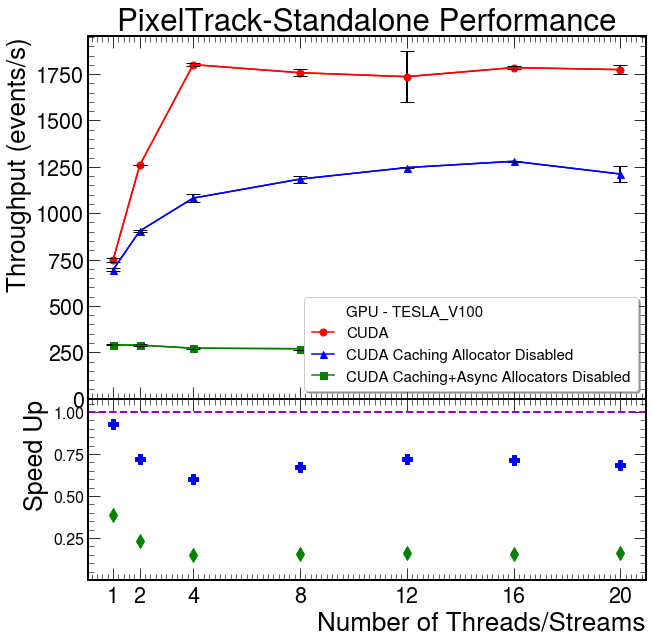

In [49]:
plot3('GPU',cuda1,'CUDA',cuda1_str,cuda2,'CUDA Caching Allocator Disabled',cuda2_str,cuda3,'CUDA Caching+Async Allocators Disabled',cuda3_str,gpu='TESLA_V100')